In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

## The gamma function usage differs beteween nilearn and pybids

I wanted to check whether the error impacted the default HRF.  It was an error that was fixed in nilearn that wasn't changed in pybids [https://github.com/nilearn/nilearn/commit/e7a8bf5fce937088f71aa6993743a938fa0f17f4](https://github.com/nilearn/nilearn/commit/e7a8bf5fce937088f71aa6993743a938fa0f17f4)

Sorry, this is just quick code.  `gamma` is used twice.  The first comparison is for the first gamma function and the second is for the second.  I didn't put them together to recreate the HRF, but this should be adequate.

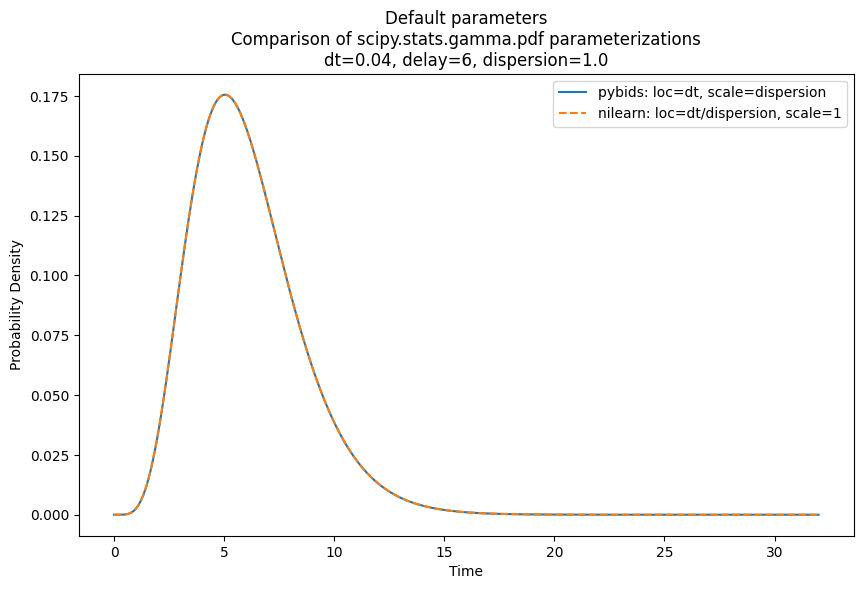

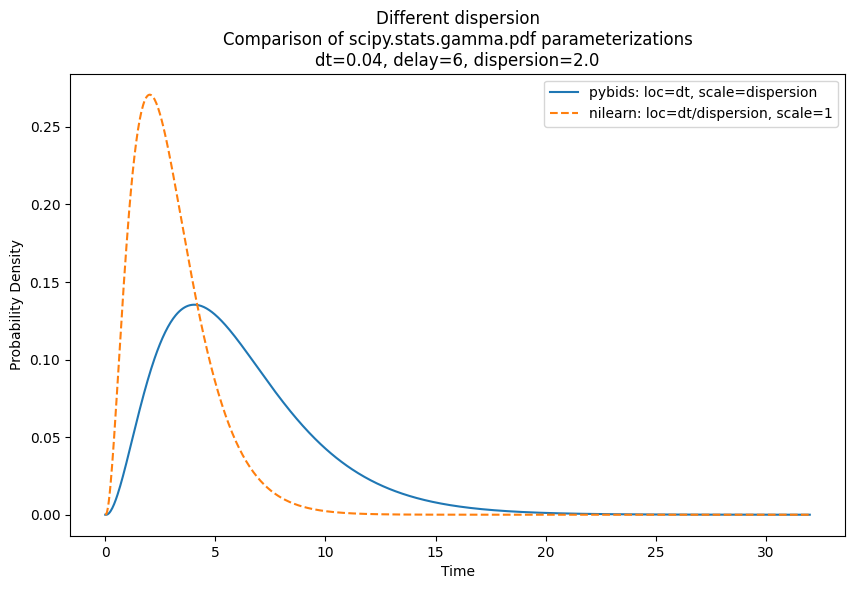

In [2]:
t_r = 2
oversampling = 50
time_length = 32.0
onset = 0.0
delay = 6
undershoot = 16.0
u_dispersion = 1.0
ratio = 0.167

dt = t_r / oversampling
time_stamps = np.linspace(0, time_length, int(np.rint(float(time_length) / dt)))

dispersions = [1.0, 2.0]

for dispersion in dispersions:
    pdf_pybids = gamma.pdf(time_stamps, delay / dispersion, loc=dt, scale=dispersion)
    pdf_nilearn = gamma.pdf(time_stamps, delay / dispersion, dt / dispersion)

    plt.figure(figsize=(10, 6))
    plt.plot(
        time_stamps,
        pdf_pybids,
        label='pybids: loc=dt, scale=dispersion',
    )
    plt.plot(
        time_stamps,
        pdf_nilearn,
        label='nilearn: loc=dt/dispersion, scale=1',
        linestyle='--',
    )
    title_extra = 'Default parameters' if dispersion == 1.0 else 'Different dispersion'
    plt.title(
        f'{title_extra}\nComparison of scipy.stats.gamma.pdf parameterizations\n'
        f'dt={dt}, delay={delay}, dispersion={dispersion}'
    )
    plt.xlabel('Time')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

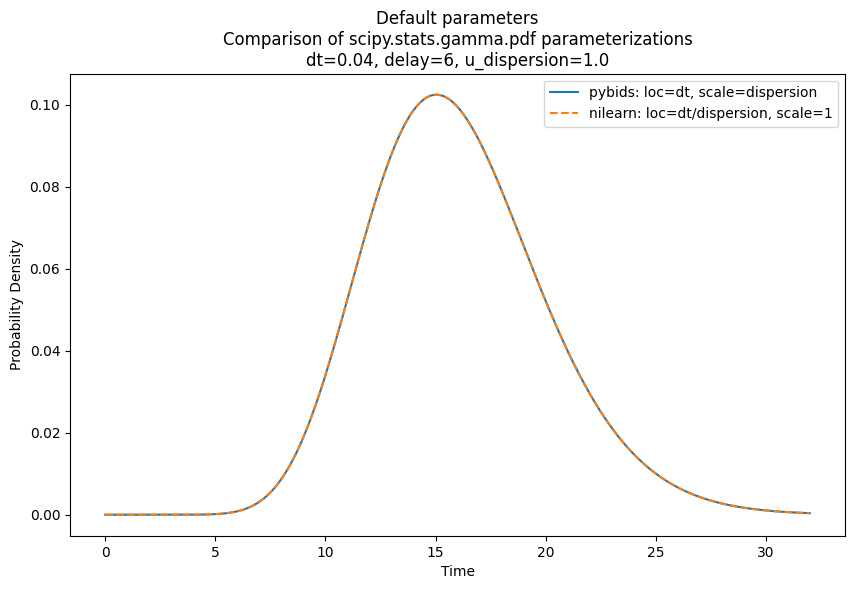

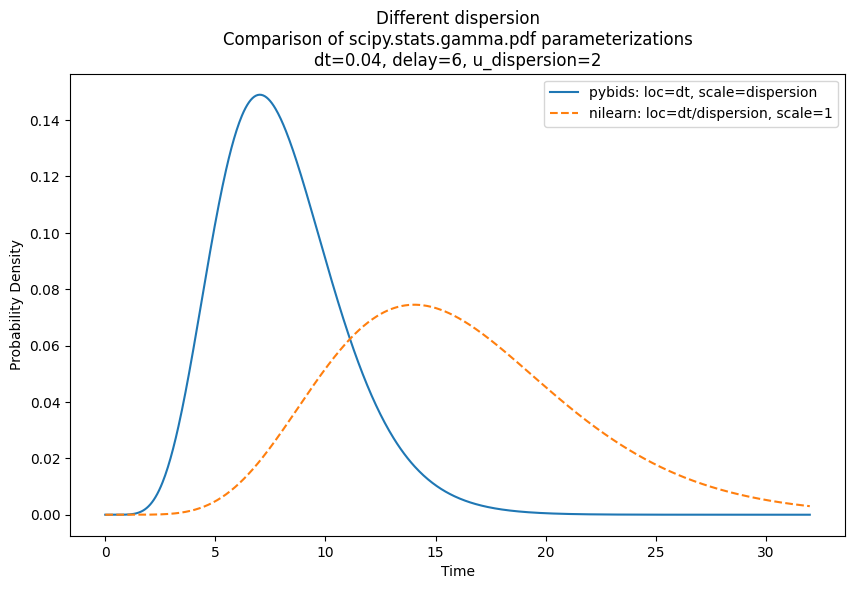

In [3]:
# Undershoot comparison
t_r = 2
oversampling = 50
time_length = 32.0
onset = 0.0
delay = 6
undershoot = 16.0
u_dispersion = 1.0
ratio = 0.167

dt = t_r / oversampling
time_stamps = np.linspace(0, time_length, int(np.rint(float(time_length) / dt)))

u_dispersions = [1.0, 2]

for u_dispersion in u_dispersions:
    pdf_pybids = gamma.pdf(time_stamps, undershoot / u_dispersion, dt / u_dispersion)
    pdf_nilearn = gamma.pdf(
        time_stamps, undershoot / u_dispersion, loc=dt, scale=u_dispersion
    )

    plt.figure(figsize=(10, 6))
    plt.plot(
        time_stamps,
        pdf_pybids,
        label='pybids: loc=dt, scale=dispersion',
    )
    plt.plot(
        time_stamps,
        pdf_nilearn,
        label='nilearn: loc=dt/dispersion, scale=1',
        linestyle='--',
    )
    title_extra = (
        'Default parameters' if u_dispersion == 1.0 else 'Different dispersion'
    )
    plt.title(
        f'{title_extra}\nComparison of scipy.stats.gamma.pdf parameterizations\n'
        f'dt={dt}, delay={delay}, u_dispersion={u_dispersion}'
    )
    plt.xlabel('Time')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()